In [3]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def sliding_average(data, window_size):
    """Calculate the sliding (moving) average of a dataset with edge handling."""
    pad_width = window_size // 2
    padded_data = np.pad(data, pad_width, mode='edge')
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')
    return smoothed_data

In [5]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [6]:
color1 = np.array([1, 0.682, 0.286])
color2 = np.array([0.008, 0.294, 0.478])
color3 = np.array([0.267, 0.647, 0.761])
color4 = np.array([0.5, 0.5, 0.5])

In [7]:
log = lammps_logfile.File("breakable.log")
timestep = 1 # fs
time_0 = log.get("Step", run_num=0)
TotEng_0 = log.get("TotEng", run_num=0) # Kcal/mol
time_1 = log.get("Step", run_num=1)
TotEng_1 = log.get("TotEng", run_num=1) # Kcal/mol

time_0 /= 1000 # ps
time_1 /= 1000 # ps
TotEng_0 /= 1000 # Mcal/mol
TotEng_1 /= 1000 # Mcal/mol

stress_strain = np.loadtxt("breakable.dat")
strain = sliding_average(stress_strain[:,0], 10)
stress = sliding_average(stress_strain[:,1], 10)

In [8]:
#smoothed_time = sliding_average(time, 5)
#TotEng = sliding_average(TotEng, 5)
#Lcnt = sliding_average(Lcnt, 5)
#Fcnt = sliding_average(Fcnt, 5)

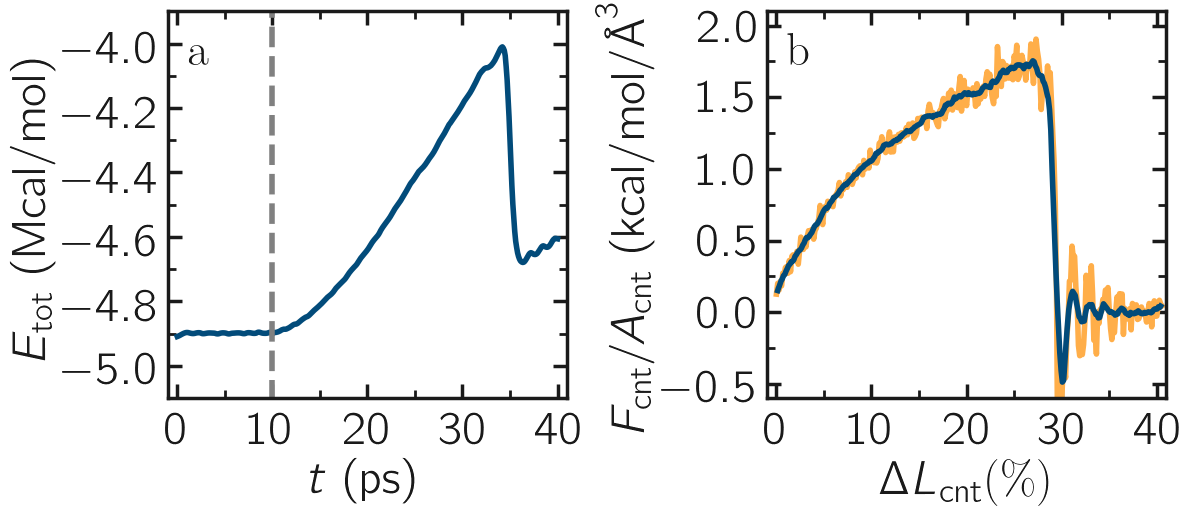

In [14]:
filename = "CNT-breakable-stress-energy"
# Initialise figure
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,5.25), dark_mode = False,
                     transparency = False, use_serif=False, n_colone=2)
# Panel a
myplt.add_panel()
myplt.add_plot(x = time_0, y = TotEng_0, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.add_plot(x = time_1, y = TotEng_1, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
x = np.linspace(-5.2, -3.8)
myplt.add_plot(x = x*0+10, y = x, type = "plot", linewidth_data = 1.5,
               marker = "--", data_color = color4, markersize = 12)
myplt.complete_panel(ylabel = r'$E_\mathrm{tot} ~ \mathrm{(Mcal/mol)}$',
                     xlabel = r'$t~\mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 41, 10), y_ticks=np.arange(-5, -3.9, 0.2),
                   x_boundaries=(-1, 41), y_boundaries=(-5.1, -3.9))
# Panel b
myplt.add_panel()
myplt.add_plot(x = stress_strain[:,0], y = stress_strain[:,1], type = "plot", linewidth_data = 3,
               marker = "-", data_color = color1, markersize = 12)
myplt.add_plot(x = strain, y = stress, type = "plot", linewidth_data = 3,
               marker = "-", data_color = color2, markersize = 12)
myplt.complete_panel(ylabel = r'$F_\mathrm{cnt}/A_\mathrm{cnt} ~ (\mathrm{kcal/mol/\AA}^3)$',
                     xlabel = r'$\Delta L_\mathrm{cnt} \textrm{(\%)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 41, 10), y_ticks=np.arange(-0.5, 2.1, 0.5),
                   x_boundaries=(-1, 41), y_boundaries=(-0.6, 2.1))

# Print figure
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)